<a href="https://colab.research.google.com/github/Cooper-9/Notes-from-class/blob/main/Kapitza_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze the motion and stability of the inverted state of a rigid pendulum, with a vertically driven pivot point.

**This notebook will test the parameters needed for a stable system of an inverted driven pendulum.**

### Pseudocode
  1. **Import needed modules:** `numpy` as np, `solve_ivp` from `scipy.integrate`, and `matplotlib.pyplot` as plt.
  2. **Define ODE function**: A form of the equation with respect to time as drive frequency tau...   $\ddot\theta + 2\zeta\dot\theta + (\epsilon^2 - \alpha cos\tau)sin\theta = 0$. Epsilon represents the dimensionless frequency, alpha represents the drive amplitude relative to the arm length, zeta represents the dimensionless damping coefficient, and tau is the new time scale with respect to drive frequency. $(\epsilon = \omega_0 / \omega_d), (\alpha = y_0 / l), (\zeta = \gamma / w_d), (\dot\theta = d\theta/d\dot\tau), (\tau = w_dt)  $
  3. **Create utilities:** Create the contour plot which shows the dimensionless frequency (epsilon) versus the drive amplitude relative to arm length (alpha), both with respect to the cos of angle theta.
  


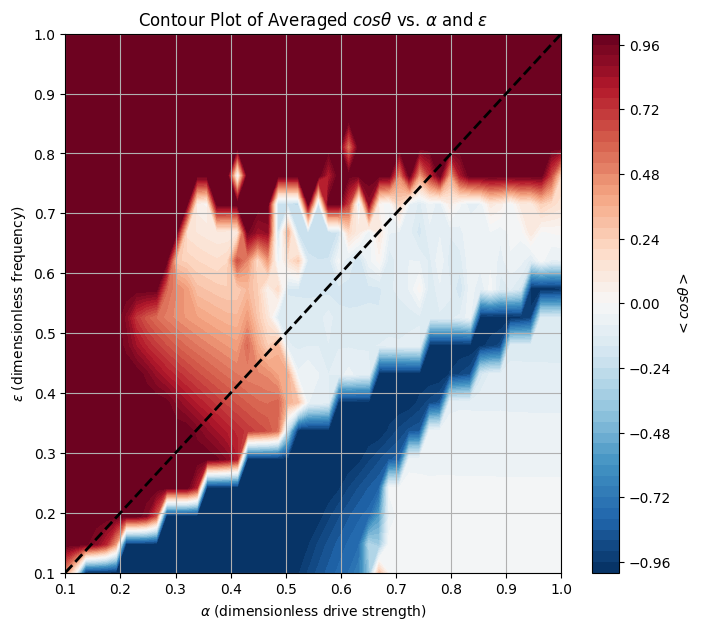

In [80]:
import matplotlib.pyplot as plt

# Create a meshgrid for alpha and epsilon
alpha_mesh, epsilon_mesh = np.meshgrid(alpha_list, epsilon_list)

plt.figure(figsize=(8, 7))
plt.contourf(alpha_mesh, epsilon_mesh, cos_theta_mesh, levels=50, cmap='RdBu_r')
plt.colorbar(label=r'$<cos\theta>$')
plt.xlabel(r'$\alpha$ (dimensionless drive strength)')
plt.ylabel(r'$\epsilon$ (dimensionless frequency)')
plt.title(r'Contour Plot of Averaged $cos\theta$ vs. $\alpha$ and $\epsilon$')
plt.grid(True)
plt.show()

# We know that cos(pi) = -1, which corresponds to the inverted state of the pendulum. Knowing this, the contour graph above shows both the driving strength alpha and the frequency epsilon in respect to the cos of the angle. The blue are represents parameters that lead to stability after a long time.  

### Define our equation of motion for pivot-drive pendulum

In [37]:
# import modules
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [38]:
# define equation of motion
def pivot_driven_pendulum(tau, y, epsilon, alpha, zeta):
  """
  tau: float
    dimensionless time: tau = omega_d * t
  alpha: float
    relative distplacement of the pivot ot the pendulum arm: alpha = y_0/l
  epsilon: float
    dimensionless frequency: epsilon = omega_0/omega_d
  zeta: float
    dimensionless damping coefficient
  Returns:
  dy_dtau: ndarray
    time derivatives of state variables

  """
  theta, ang_vel = y #unpack state variable
  dtheta_dtau = ang_vel #define angular velocity
  d2theta_dtau2 = -2*zeta*dtheta_dtau - (epsilon**2 - alpha*np.cos(tau))*np.sin(theta)
  dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
  return dy_dtau # return derivative

### Define utilities
1. **`alpha_critical`**: our gues for the boundary of the inverted state. Parameters are `zeta`, `epsilon`, `coefficient`; returns `alpha`.

In [39]:
# define alpha_critical
def alpha_critical(epsilon, zeta, coefficient):
  """
  epsilon: float
    dimensionless frequency: epsilon = omega_0/omega_
  zeta: float
    dimensionless damping coefficient
  coefficient: float
    tuning parameter to help with fit
  Returns:
  alpha: float
    relative displacement of the pivot to the pendulum arm: alpha = y_0/l
  """
  alpha = coefficient*epsilon # our guess at the moment (omits zeta)
  return alpha

### Solve the equation of motion

In [48]:
# input parameters
epsilon = 0.2 # dimensionless angular frequency
alpha = 0.2 # dimensionless drive strength
zeta = 0.1 # dimensionless damping

# number of decay times we want to integrate over
n_decay = 500

def average_long_timescale_response(epsilon, alpha, zeta, n_decay=100, delta_theta=0.01):
  # define span of tau
  tau_min = 0
  tau_max = n_decay/(2*zeta)
  tau_span = [tau_min, tau_max]

  # define an initial state
  delta_theta = 0.01 # deviation of theta from pi / inverted state
  theta_0 = np.pi - delta_theta
  ang_vel_0 = 0
  y_0 = [theta_0, ang_vel_0]

  # solve equation of motion
  solution = solve_ivp(pivot_driven_pendulum, tau_span, y_0, args=(epsilon, alpha, zeta), method='Radau', dense_output = True)

  # calculate our measure of the long timescale response
  tau_averaging_range = np.linspace(n_decay-1/(2*zeta), n_decay/(2*zeta), 1000)
  cos_theta_averaging = np.mean(np.cos(solution.sol(tau_averaging_range) [0]))


  return cos_theta_averaging, solution

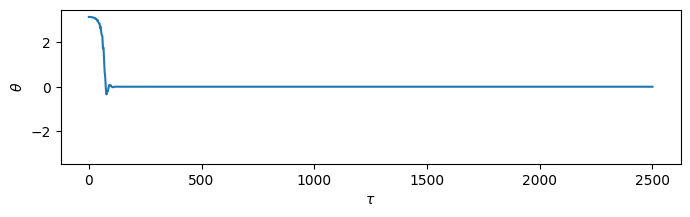

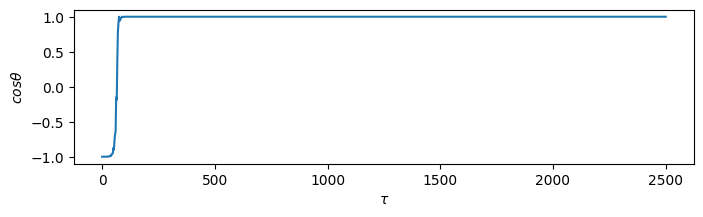

In [49]:
# plot theta
tau_min = 0
tau_max = n_decay/(2*zeta)
tau_plot = np.linspace(tau_min, tau_max, 1000)
theta_plot = solution.sol(tau_plot)[0]

# plot theta
plt.figure(figsize=(8,2))
plt.plot(tau_plot, (theta_plot))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')
plt.ylim(-np.pi*1.1, np.pi*1.1)
plt.show()

plt.figure(figsize=(8,2))
plt.plot(tau_plot, np.cos((theta_plot)))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$cos\theta$')
plt.ylim(-1.1, 1.1)
plt.show()

# Separation between my work (above) and what gemini came up with.


In [57]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [59]:
def pivot_driven_pendulum(tau, y, epsilon, alpha, zeta):
  """
  tau: float
    dimensionless time: tau = omega_d * t
  alpha: float
    relative distplacement of the pivot ot the pendulum arm: alpha = y_0/l
  epsilon: float
    dimensionless frequency: epsilon = omega_0/omega_d
  zeta: float
    dimensionless damping coefficient
  Returns:
  dy_dtau: ndarray
    time derivatives of state variables

  """
  theta, ang_vel = y #unpack state variable
  dtheta_dtau = ang_vel #define angular velocity
  d2theta_dtau2 = -2*zeta*dtheta_dtau - (epsilon**2 - alpha*np.cos(tau))*np.sin(theta)
  dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
  return dy_dtau # return derivative

In [60]:
def average_long_timescale_response(epsilon, alpha, zeta, n_decay=100, delta_theta=0.01):
  # define span of tau
  tau_min = 0
  tau_max = n_decay/(2*zeta)
  tau_span = [tau_min, tau_max]

  # define an initial state
  delta_theta = 0.01 # deviation of theta from pi / inverted state
  theta_0 = np.pi - delta_theta
  ang_vel_0 = 0
  y_0 = [theta_0, ang_vel_0]

  # solve equation of motion
  solution = solve_ivp(pivot_driven_pendulum, tau_span, y_0, args=(epsilon, alpha, zeta), method='Radau', dense_output = True)

  # calculate our measure of the long timescale response
  tau_averaging_range = np.linspace(n_decay-1/(2*zeta), n_decay/(2*zeta), 1000)
  cos_theta_averaging = np.mean(np.cos(solution.sol(tau_averaging_range) [0]))


  return cos_theta_averaging, solution

In [82]:
import numpy as np

# test average long timescale response

# Define ranges for alpha and epsilon
alpha_list = np.linspace(0.1, 1.5, 50) # Increased upper limit from 1.0 to 1.5
epsilon_list = np.linspace(0.1, 1.0, 20) # Keep at 20 points for now

# Initialize cos_theta_mesh
cos_theta_mesh = np.zeros((len(epsilon_list), len(alpha_list)))

# Loop to calculate cos_theta_averaging for each combination
for i, epsilon_val in enumerate(epsilon_list):
    for j, alpha_val in enumerate(alpha_list):
        # Use a larger n_decay to allow the system to settle for a more meaningful contour plot.
        cos_theta_averaging, _ = average_long_timescale_response(epsilon_val, alpha_val, zeta=0.1, n_decay=100) # n_decay=100 from previous step
        cos_theta_mesh[i, j] = cos_theta_averaging

# These parameters were used for a single run, not the loop above.
# They are kept here for consistency with the original notebook's intent
# but commented out to avoid confusion about which parameters drive the loop.
# epsilon = 0.2 # dimensionless angular frequency
# alpha = 0.2 # dimensionless drive strength
# zeta = 0.1 # dimensionless damping

# number of decay times we want to integrate over for single run (if uncommented)
# n_decay = 500

# delta_theta = 0.01 # deviation of theta from pi / inverted state

# This single call is separate from the mesh generation loop
cos_theta_averaging_single, solution_single = average_long_timescale_response(epsilon=0.2, alpha=0.2, zeta=0.1, n_decay=500)

# Assign to the variables expected by subsequent cells, if they use the single run's results.
# For the contour plot, the mesh is the primary output.
epsilon = 0.2 # Re-assigning a value for epsilon as it might be used by other cells for a specific plot
alpha = 0.2 # Re-assigning a value for alpha as it might be used by other cells for a specific plot
zeta = 0.1 # Re-assigning a value for zeta
n_decay = 500 # Re-assigning a value for n_decay
solution = solution_single # Make the solution from the single run available for plotting

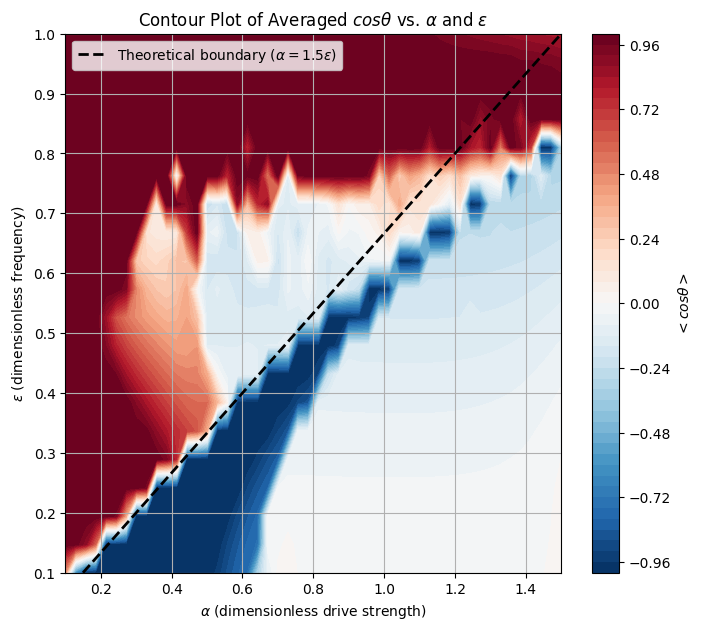

In [83]:
import matplotlib.pyplot as plt

# Create a meshgrid for alpha and epsilon
alpha_mesh, epsilon_mesh = np.meshgrid(alpha_list, epsilon_list)

plt.figure(figsize=(8, 7))
plt.contourf(alpha_mesh, epsilon_mesh, cos_theta_mesh, levels=50, cmap='RdBu_r')
plt.colorbar(label=r'$<cos\theta>$')
plt.xlabel(r'$\alpha$ (dimensionless drive strength)')
plt.ylabel(r'$\epsilon$ (dimensionless frequency)')
plt.title(r'Contour Plot of Averaged $cos\theta$ vs. $\alpha$ and $\epsilon$')
plt.grid(True)

# --- Add this section to plot an independent line ---
# Example: Plot a line representing a theoretical critical boundary
# Using a coefficient for the critical alpha. You can change this value.
critical_coefficient = 1.5 # Changed from 2.0 to 1.5 for a different slope

# Ensure epsilon_list covers the range for the line calculation
epsilon_for_line = np.linspace(epsilon_list.min(), epsilon_list.max(), 100)

# Calculate alpha_critical values for the line
# Assuming alpha_critical function is defined (e.g., from cell 1nnr66ZjuJ26)
# and zeta is available in the kernel (zeta=0.1 from your kernel state)
alpha_critical_values = alpha_critical(epsilon_for_line, zeta=zeta, coefficient=critical_coefficient)

plt.plot(alpha_critical_values, epsilon_for_line, color='black', linestyle='--', linewidth=2, label=rf'Theoretical boundary ($\alpha = {critical_coefficient}\epsilon$)')
plt.legend()
# ----------------------------------------------------

plt.show()

#